In [1]:
import numpy as np
import pandas as pd

**Group-by** is a process involving one or more of the following steps:
- **Splitting** the data into groups based on some criteria
- **Applying** a function to each group independently
  - **Aggregation** -- Compute summary statistics for each group
  - **Transformation** -- Perform some group-specific computation and return a like-indexed object
  - **Filtration** -- Discard some groups according to a group-wise computation that evaluates to `True` or `False` 
- **Combining** the results into a data structure

# Splitting an object into groups

In [2]:
# Create DataFrame with speeds of different animals
speeds = pd.DataFrame(
    [
        ('bird', 'Falconiformes', 389.0),
        ('bird', 'Psittaciformes', 24.0),
        ('mammal', 'Carnivora', 80.2),
        ('mammal', 'Primates', np.nan),
        ('mammal', 'Carnivora', 58)
    ],
    index=['falcon', 'parrot', 'lion', 'monkey', 'leopard'],
    columns=('class', 'order', 'max_speed')
)

speeds

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [3]:
# Group rows by class
# Note that while this appears similar to a MultiIndexed DataFrame,
# the GroupBy objects are not quite the same and allow different functionality
speeds.groupby('class').apply(lambda x: x[:], include_groups=False)

order  max_speed
class                                    
bird   falcon    Falconiformes      389.0
       parrot   Psittaciformes       24.0
mammal lion          Carnivora       80.2
       monkey         Primates        NaN
       leopard       Carnivora       58.0

In [4]:
# Group rows by class and order
speeds.groupby(['class', 'order']).apply(lambda x: x[:], include_groups=False)

max_speed
class  order                            
bird   Falconiformes  falcon       389.0
       Psittaciformes parrot        24.0
mammal Carnivora      lion          80.2
                      leopard       58.0
       Primates       monkey         NaN

In [5]:
# Create DataFrame with arbitrary data
df = pd.DataFrame({
    'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
    'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
    'C': np.random.randn(8),
    'D': np.random.randn(8)
})

df

,A,B,C,D
0,foo,one,-1.474777,-1.013112
1,bar,one,-1.412369,0.435294
2,foo,two,-0.452237,-2.277709
3,bar,three,-0.854374,-0.514269
4,foo,two,-0.334392,-0.979432
5,bar,two,0.569884,2.204088
6,foo,one,0.308462,-1.406474
7,foo,three,-1.550298,-1.463487


In [6]:
# Group by column 'A'
df.groupby('A').apply(lambda x: x[:], include_groups=False)

B         C         D
A                               
bar 1    one -1.412369  0.435294
    3  three -0.854374 -0.514269
    5    two  0.569884  2.204088
foo 0    one -1.474777 -1.013112
    2    two -0.452237 -2.277709
    4    two -0.334392 -0.979432
    6    one  0.308462 -1.406474
    7  three -1.550298 -1.463487

In [7]:
# Group by column 'B'
df.groupby('B').apply(lambda x: x[:], include_groups=False)

A         C         D
B                               
one   0  foo -1.474777 -1.013112
      1  bar -1.412369  0.435294
      6  foo  0.308462 -1.406474
three 3  bar -0.854374 -0.514269
      7  foo -1.550298 -1.463487
two   2  foo -0.452237 -2.277709
      4  foo -0.334392 -0.979432
      5  bar  0.569884  2.204088

In [8]:
# Group by columns 'A' and 'B'
df.groupby(['A', 'B']).apply(lambda x: x[:], include_groups=False)

C         D
A   B                          
bar one   1 -1.412369  0.435294
    three 3 -0.854374 -0.514269
    two   5  0.569884  2.204088
foo one   0 -1.474777 -1.013112
          6  0.308462 -1.406474
    three 7 -1.550298 -1.463487
    two   2 -0.452237 -2.277709
          4 -0.334392 -0.979432

In [9]:
# Reindex DataFrame to have MultiIndex
df2 = df.set_index(['A', 'B'])
df2

C         D
A   B                        
foo one   -1.474777 -1.013112
bar one   -1.412369  0.435294
foo two   -0.452237 -2.277709
bar three -0.854374 -0.514269
foo two   -0.334392 -0.979432
bar two    0.569884  2.204088
foo one    0.308462 -1.406474
    three -1.550298 -1.463487

In [10]:
# Group by MultiIndex level 'A'
# Sum columns 'C' and 'D' within each group
grouped = df2.groupby(level='A')
grouped.sum()


,C,D
A,,
bar,-1.696860,2.125114
foo,-3.503242,-7.140214


In [11]:
# Group by columns -- consonants or vowels
def get_letter_type(letter):
    if letter.lower() in 'aeiou':
        return 'vowels'
    else:
        return 'consonants'
    
df.T.groupby(get_letter_type).apply(lambda x: x[:], include_groups=False)

0         1         2         3         4         5  \
consonants B       one       one       two     three       two       two   
           C -1.474777 -1.412369 -0.452237 -0.854374 -0.334392  0.569884   
           D -1.013112  0.435294 -2.277709 -0.514269 -0.979432  2.204088   
vowels     A       foo       bar       foo       bar       foo       bar   

                     6         7  
consonants B       one     three  
           C  0.308462 -1.550298  
           D -1.406474 -1.463487  
vowels     A       foo       foo

In [12]:
# Create Series with duplicate index values
s = pd.Series([1, 2, 3, 10, 20, 30], index=[1, 2, 3, 1, 2, 3])
s

1     1
2     2
3     3
1    10
2    20
3    30
dtype: int64

In [13]:
# Group Series by index
grouped = s.groupby(level=0)
grouped.apply(lambda x: x[:], include_groups=False)

1  1     1
   1    10
2  2     2
   2    20
3  3     3
   3    30
dtype: int64

In [14]:
# Sum values within each group
grouped.sum()

1    11
2    22
3    33
dtype: int64

## `GroupBy` sorting 

In [15]:
# Create DataFrame
df2 = pd.DataFrame({
    'X': ['B', 'B', 'A', 'A'],
    'Y': [1, 2, 3, 4]
})

df2

,X,Y
0,B,1
1,B,2
2,A,3
3,A,4


In [16]:
# Group by column 'X' and sum values in column 'Y'
# Groups are sorted lexicographically or numerically by default
df2.groupby('X').sum()

,Y
X,
A,7
B,3


In [17]:
# Group by column 'X' and sum values in column 'Y', without sorting groups
df2.groupby('X', sort=False).sum()

,Y
X,
B,3
A,7


In [18]:
# Create DataFrame
df3 = pd.DataFrame({
    'X': ['A', 'B', 'A', 'B'],
    'Y': [1, 4, 3, 2]
})

df3

,X,Y
0,A,1
1,B,4
2,A,3
3,B,2


In [19]:
# Group by column 'X' and examine group 'A' to see that the order of rows in group is preserved
df3.groupby('X').get_group('A')

,X,Y
0,A,1
2,A,3


In [20]:
# Group by column 'X' and examine group 'B' to see that the order of rows in group is preserved
df3.groupby('X').get_group('B')

,X,Y
1,B,4
3,B,2


### `GroupBy` `dropna`

In [21]:
# Crate DataFrame with missing value
df_list = [
    [1, 2, 3],
    [1, None, 4],
    [2, 1, 3],
    [1, 2, 2]
]

df_dropna = pd.DataFrame(df_list, columns=['a', 'b', 'c'])
df_dropna

,a,b,c
0,1,2.0,3
1,1,NaN,4
2,2,1.0,3
3,1,2.0,2


In [22]:
# Group by column 'b', dropping missing values, sum values in each group
df_dropna.groupby('b', dropna=True).sum()

,a,c
b,,
1.0,2,3
2.0,2,5


In [23]:
# Group by column 'b', keeping missing values, sum values in each group
df_dropna.groupby('b', dropna=False).sum()

,a,c
b,,
1.0,2,3
2.0,2,5
NaN,1,4


## `GroupBy` object attributes

In [24]:
# Show DataFrame
df

,A,B,C,D
0,foo,one,-1.474777,-1.013112
1,bar,one,-1.412369,0.435294
2,foo,two,-0.452237,-2.277709
3,bar,three,-0.854374,-0.514269
4,foo,two,-0.334392,-0.979432
5,bar,two,0.569884,2.204088
6,foo,one,0.308462,-1.406474
7,foo,three,-1.550298,-1.463487


In [25]:
# Group by 'A' and list groups as dictionary
df.groupby('A').groups

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [26]:
# Group columns by letter type and list groups as dictionary
df.T.groupby(get_letter_type).groups

{'consonants': ['B', 'C', 'D'], 'vowels': ['A']}

In [27]:
# Group by 'A' and get number of groups
df.groupby('A').ngroups

2

In [28]:
# Group by 'A' and get number of groups
len(df.groupby('A'))

2

In [29]:
# Create DataFrame
n = 10
weight = np.random.normal(166, 20, size=n)
height = np.random.normal(60, 10, size=n)
time = pd.date_range('2024-11-28', periods=n)
gender = np.random.choice(['male', 'female'], size=n)

df = pd.DataFrame({'height': height, 'weight': weight, 'gender': gender}, index=time)
df

,height,weight,gender
2024-11-28,70.535383,149.886965,male
2024-11-29,57.788797,144.377173,male
2024-11-30,57.876863,208.506233,female
2024-12-01,48.892958,159.893763,male
2024-12-02,64.333238,144.763639,male
2024-12-03,60.742973,137.584449,female
2024-12-04,65.154659,205.825393,male
2024-12-05,57.883669,191.815625,male
2024-12-06,67.353927,191.054116,male
2024-12-07,45.585717,166.211083,female


In [30]:
# Group by gender and calculate averages
df.groupby('gender').mean()

,height,weight
gender,,
female,54.735185,170.767255
male,61.706090,169.659525


# `GroupBy` with `MultiIndex`

In [31]:
# Create a MultiIndex Series
arrays = [
    ['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']
]

index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])

s = pd.Series(np.random.randn(8), index=index)
s

first  second
bar    one      -0.249762
       two       0.243520
baz    one      -0.243118
       two       0.961993
foo    one      -0.695210
       two      -0.161295
qux    one       1.672168
       two      -2.233607
dtype: float64

In [32]:
# Group by highest level of MultiIndex, sum within groups
grouped = s.groupby(level=0)
grouped.sum()

first
bar   -0.006242
baz    0.718876
foo   -0.856505
qux   -0.561440
dtype: float64

In [33]:
# Grop by lowest level of MultiIndex, sum within groups
s.groupby(level='second').sum()

second
one    0.484079
two   -1.189389
dtype: float64

In [34]:
# Create MultiIndex Series
arrays = [
    ['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
    ['doo', 'doo', 'bee', 'bee', 'bop', 'bop', 'bop', 'bop'],
    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']
]

index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second', 'third'])

s = pd.Series(np.random.randn(8), index=index)
s

first  second  third
bar    doo     one     -0.524478
               two     -2.179806
baz    bee     one     -0.303009
               two      1.212366
foo    bop     one     -0.382774
               two     -2.530501
qux    bop     one     -0.515189
               two      1.707829
dtype: float64

In [35]:
# Group by first two levels of MultiIndex, sum within groups
s.groupby(level=['first', 'second']).sum()

first  second
bar    doo      -2.704284
baz    bee       0.909357
foo    bop      -2.913275
qux    bop       1.192640
dtype: float64

## Grouping `DataFrame` with `Index` levels and columns

In [36]:
# Create MultiIndex DataFrame
arrays = [
    ['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']
]

index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])

df = pd.DataFrame(
    {
        'A': [1, 1, 1, 1, 2, 2, 3, 3],
        'B': np.arange(8)
    },
    index=index
)

df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [37]:
# Group by index 'second' and column 'A', sum within groups
df.groupby([pd.Grouper(level='second'), 'A']).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [38]:
# Group by index 'second' and column 'A', sum within groups
df.groupby(['second', 'A']).sum()

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

## `DataFrame` column selection in `GroupBy`

In [39]:
# Create DataFrame
df = pd.DataFrame({
    'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
    'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
    'C': np.random.randn(8),
    'D': np.random.randn(8)
})

df

,A,B,C,D
0,foo,one,1.011765,-0.550938
1,bar,one,-1.061426,-1.244113
2,foo,two,1.084979,2.411466
3,bar,three,0.440198,-1.018983
4,foo,two,-0.160955,1.124747
5,bar,two,-1.523134,0.354417
6,foo,one,0.511328,-0.131943
7,foo,three,0.016783,0.966894


In [40]:
# Group by column 'A', then select grouped column 'C'
df.groupby('A')['C'].apply(lambda x: x[:], include_groups=False)

A     
bar  1   -1.061426
     3    0.440198
     5   -1.523134
foo  0    1.011765
     2    1.084979
     4   -0.160955
     6    0.511328
     7    0.016783
Name: C, dtype: float64

# Iterating through groups

In [41]:
# Show DataFrame
df

,A,B,C,D
0,foo,one,1.011765,-0.550938
1,bar,one,-1.061426,-1.244113
2,foo,two,1.084979,2.411466
3,bar,three,0.440198,-1.018983
4,foo,two,-0.160955,1.124747
5,bar,two,-1.523134,0.354417
6,foo,one,0.511328,-0.131943
7,foo,three,0.016783,0.966894


In [42]:
# Group by column 'A', iterate through groups
for name, group in df.groupby('A'):
    print(name)
    print(group)
    print()

bar
     A      B         C         D
1  bar    one -1.061426 -1.244113
3  bar  three  0.440198 -1.018983
5  bar    two -1.523134  0.354417

foo
     A      B         C         D
0  foo    one  1.011765 -0.550938
2  foo    two  1.084979  2.411466
4  foo    two -0.160955  1.124747
6  foo    one  0.511328 -0.131943
7  foo  three  0.016783  0.966894



In [43]:
# Group by columns 'A' and 'B', iterate through groups
for name, group in df.groupby(['A', 'B']):
    print(name)
    print(group)
    print()

('bar', 'one')
     A    B         C         D
1  bar  one -1.061426 -1.244113

('bar', 'three')
     A      B         C         D
3  bar  three  0.440198 -1.018983

('bar', 'two')
     A    B         C         D
5  bar  two -1.523134  0.354417

('foo', 'one')
     A    B         C         D
0  foo  one  1.011765 -0.550938
6  foo  one  0.511328 -0.131943

('foo', 'three')
     A      B         C         D
7  foo  three  0.016783  0.966894

('foo', 'two')
     A    B         C         D
2  foo  two  1.084979  2.411466
4  foo  two -0.160955  1.124747



# Selecting a group

In [44]:
# Show DataFrame
df

,A,B,C,D
0,foo,one,1.011765,-0.550938
1,bar,one,-1.061426,-1.244113
2,foo,two,1.084979,2.411466
3,bar,three,0.440198,-1.018983
4,foo,two,-0.160955,1.124747
5,bar,two,-1.523134,0.354417
6,foo,one,0.511328,-0.131943
7,foo,three,0.016783,0.966894


In [45]:
# Group by column 'A' and select group 'bar'
df.groupby('A').get_group('bar')


,A,B,C,D
1,bar,one,-1.061426,-1.244113
3,bar,three,0.440198,-1.018983
5,bar,two,-1.523134,0.354417


In [46]:
# Group by columns 'A' and 'B' and select group ('bar', 'one')
df.groupby(['A', 'B']).get_group(('bar', 'one'))

,A,B,C,D
1,bar,one,-1.061426,-1.244113


# Aggregation

In [47]:
# Create DataFrame with heights and weights of animals
animals = pd.DataFrame({
    'kind': ['cat', 'dog', 'cat', 'dog'],
    'height': [9.1, 6.0, 9.5, 34.0],
    'weight': [7.9, 7.5, 9.9, 198.0]
})

animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [48]:
# Group animals by 'kind', sum heights and weights
animals.groupby('kind').sum()

,height,weight
kind,,
cat,18.6,17.8
dog,40.0,205.5


In [49]:
# Group animals by 'kind', sum heights and weights, keep 'kind' column in result
animals.groupby('kind', as_index=False).sum()

,kind,height,weight
0,cat,18.6,17.8
1,dog,40.0,205.5


## Built-in aggregation methods
- `count()`     -- Compute the number of non-NaN values in each group
- `nunique()`   -- Compute the number of unique values in each group
- `size()`      -- Compute the number of values in each group
---
- `first()`     -- Compute the first occurring value in each group
- `last()`      -- Compute the last occurring value in each group
---
- `max()`       -- Compute the maximum value in each group
- `min()`       -- Compute the minimum value in each group
- `idxmax()`    -- Compute the index of the maximum value in each group
- `idxmin()`    -- Compute the index of the minimum value in each group
---
- `sum()`       -- Compute the sum of the values in each group
- `prod()`      -- Compute the product of the values in each group
---
- `mean()`      -- Compute the mean of the values in each group
- `median()`    -- Compute the median of the values in each group
- `quantile()`  -- Compute the quantile of the values in each group
- `std()`       -- Compute the standard deviation of the values in each group
- `sem()`       -- Compute the standard error of the mean of the values in each group
- `var()`       -- Compute the variance of the values in each group
- `cov()`       -- Compute the covariance of the values in each group
- `skew()`      -- Compute the skew of the values in each group
---
- `any()`       -- Compute whether any of the values in the groups are truthy
- `all()`       -- Compute whether all of the values in the groups are truthy






In [50]:
# Show DataFrame
df

,A,B,C,D
0,foo,one,1.011765,-0.550938
1,bar,one,-1.061426,-1.244113
2,foo,two,1.084979,2.411466
3,bar,three,0.440198,-1.018983
4,foo,two,-0.160955,1.124747
5,bar,two,-1.523134,0.354417
6,foo,one,0.511328,-0.131943
7,foo,three,0.016783,0.966894


In [51]:
# Group by 'A'
# Find max values of groups in columns 'C' and 'D'
df.groupby('A')[['C', 'D']].max()

,C,D
A,,
bar,0.440198,0.354417
foo,1.084979,2.411466


In [52]:
# Group by 'A', 'B'
# Find mean of groups for all columns
df.groupby(['A', 'B']).mean()

C         D
A   B                        
bar one   -1.061426 -1.244113
    three  0.440198 -1.018983
    two   -1.523134  0.354417
foo one    0.761546 -0.341440
    three  0.016783  0.966894
    two    0.462012  1.768106

In [53]:
# Group by 'A', 'B'
# Compute size of each group
df.groupby(['A', 'B']).size()

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [54]:
# Group by 'A', 'B'
# Compute descriptive statistics for each group in each column
df.groupby(['A', 'B']).describe()

C                                                              \
          count      mean       std       min       25%       50%       75%   
A   B                                                                         
bar one     1.0 -1.061426       NaN -1.061426 -1.061426 -1.061426 -1.061426   
    three   1.0  0.440198       NaN  0.440198  0.440198  0.440198  0.440198   
    two     1.0 -1.523134       NaN -1.523134 -1.523134 -1.523134 -1.523134   
foo one     2.0  0.761546  0.353863  0.511328  0.636437  0.761546  0.886656   
    three   1.0  0.016783       NaN  0.016783  0.016783  0.016783  0.016783   
    two     2.0  0.462012  0.881008 -0.160955  0.150529  0.462012  0.773496   

                        D                                                    \
                max count      mean       std       min       25%       50%   
A   B                                                                         
bar one   -1.061426   1.0 -1.244113       NaN -1.244113 -1.244113 -1.244113   
    three  0.440198   1.0 -1.018983       NaN -1.018983 -1.018983 -1.018983   
    two   -1.523134   1.0  0.354417       NaN  0.354417  0.354417  0.354417   
foo one    1.011765   2.0 -0.341440  0.296274 -0.550938 -0.446189 -0.341440   
    three  0.016783   1.0  0.966894       NaN  0.966894  0.966894  0.966894   
    two    1.084979   2.0  1.768106  0.909847  1.124747  1.446427  1.768106   

                               
                75%       max  
A   B                          
bar one   -1.244113 -1.244113  
    three -1.018983 -1.018983  
    two    0.354417  0.354417  
foo one   -0.236692 -0.131943  
    three  0.966894  0.966894  
    two    2.089786  2.411466

In [55]:
# Create DataFrame
ll = [
    ['foo', 1],
    ['foo', 2],
    ['foo', 2],
    ['bar', 1],
    ['bar', 1]
]

df4 = pd.DataFrame(ll, columns=['A', 'B'])
df4

,A,B
0,foo,1
1,foo,2
2,foo,2
3,bar,1
4,bar,1


In [56]:
# Group by 'A', compute number of unique values in 'B' per group
df4.groupby('A')['B'].nunique()

A
bar    1
foo    2
Name: B, dtype: int64

## The `aggregate()` method

In [57]:
# Group by 'A', sum columns 'C' and 'D' per group using aggregate()
df.groupby('A')[['C', 'D']].agg('sum')

,C,D
A,,
bar,-2.144363,-1.908680
foo,2.463900,3.820226


In [58]:
# Group by 'A', 'B', not reindexing with group keys
# Compute sum of groups for columns
df.groupby(['A', 'B'], as_index=False).agg('sum')

,A,B,C,D
0,bar,one,-1.061426,-1.244113
1,bar,three,0.440198,-1.018983
2,bar,two,-1.523134,0.354417
3,foo,one,1.523092,-0.682881
4,foo,three,0.016783,0.966894
5,foo,two,0.924025,3.536213


In [59]:
# Group by 'A', 'B'
# Compute sum of groups for columns
# Reindex result so 'A' and 'B' are columns again
df.groupby(['A', 'B']).agg('sum').reset_index()

,A,B,C,D
0,bar,one,-1.061426,-1.244113
1,bar,three,0.440198,-1.018983
2,bar,two,-1.523134,0.354417
3,foo,one,1.523092,-0.682881
4,foo,three,0.016783,0.966894
5,foo,two,0.924025,3.536213


## Aggregation with User-Defined Functions

In [60]:
# Show animals DataFrame
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [61]:
# Group animals by 'kind'
# Collect height values into sets per kind
animals.groupby('kind')[['height']].agg(lambda x: set(x))

,height
kind,
cat,"{9.1, 9.5}"
dog,"{34.0, 6.0}"


In [62]:
# Group animals by 'kind'
# Sum height values, specifying result type
animals.groupby('kind')[['height']].agg(lambda x: x.astype(int).sum())

,height
kind,
cat,18
dog,40


## Applying multiple functions at once

In [63]:
# Show DataFrame
df

,A,B,C,D
0,foo,one,1.011765,-0.550938
1,bar,one,-1.061426,-1.244113
2,foo,two,1.084979,2.411466
3,bar,three,0.440198,-1.018983
4,foo,two,-0.160955,1.124747
5,bar,two,-1.523134,0.354417
6,foo,one,0.511328,-0.131943
7,foo,three,0.016783,0.966894


In [64]:
# Group by 'A'
# Get sum, mean, and std of groups for column 'C'
df.groupby('A')['C'].agg(['sum', 'mean', 'std'])

,sum,mean,std
A,,,
bar,-2.144363,-0.714788,1.026541
foo,2.463900,0.492780,0.564432


In [65]:
# Group by 'A'
# Get sum, mean, and std of groups for column 'C'
# Rename result columns
(
    df.groupby('A')['C']
    .agg(['sum', 'mean', 'std'])
    .rename(columns={'sum': 'foo', 'mean': 'bar', 'std': 'baz'})
)

,foo,bar,baz
A,,,
bar,-2.144363,-0.714788,1.026541
foo,2.463900,0.492780,0.564432


In [66]:
# Group by 'A'
# Get sum, mean, and std of groups for columns 'C' and 'D'
df.groupby('A')[['C', 'D']].agg(['sum', 'mean', 'std'])

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar -2.144363 -0.714788  1.026541 -1.908680 -0.636227  0.865275
foo  2.463900  0.492780  0.564432  3.820226  0.764045  1.163746

In [67]:
# Group by 'A'
# Get sum, mean, and std of groups for columns 'C' and 'D'
# Rename result columns
(
    df.groupby('A')[['C', 'D']]
    .agg(['sum', 'mean', 'std'])
    .rename(columns={'sum': 'foo', 'mean': 'bar', 'std': 'baz'})
)

C                             D                    
          foo       bar       baz       foo       bar       baz
A                                                              
bar -2.144363 -0.714788  1.026541 -1.908680 -0.636227  0.865275
foo  2.463900  0.492780  0.564432  3.820226  0.764045  1.163746

## Named aggregation

In [68]:
# Show animals DataFrame
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [69]:
# Group animals by 'kind'
# Make columns for min height, max height, and average weight
animals.groupby('kind').agg(
    min_height=pd.NamedAgg(column='height', aggfunc='min'),
    max_height=pd.NamedAgg(column='height', aggfunc='max'),
    avg_weight=pd.NamedAgg(column='weight', aggfunc='mean')
)

,min_height,max_height,avg_weight
kind,,,
cat,9.1,9.5,8.90
dog,6.0,34.0,102.75


In [70]:
# Group animals by 'kind'
# Make columns for min height, max height, and average weight
animals.groupby('kind').agg(
    min_height=('height', 'min'),
    max_height=('height', 'max'),
    avg_weight=('weight', 'mean')
)

,min_height,max_height,avg_weight
kind,,,
cat,9.1,9.5,8.90
dog,6.0,34.0,102.75


In [71]:
# Group animals by 'kind'
# Make column for "total weight"
animals.groupby('kind').agg(
    **{
        'total weight': pd.NamedAgg(column='weight', aggfunc='sum')
    }
)

,total weight
kind,
cat,17.8
dog,205.5


In [72]:
# Group animals by 'kind'
# Make columns for min and max height using only 'height' data
animals.groupby('kind').height.agg(
    min_height='min',
    max_height='max'
)

,min_height,max_height
kind,,
cat,9.1,9.5
dog,6.0,34.0


## Applying different functions to `DataFrame` columns

In [73]:
# Show DataFrame
df

,A,B,C,D
0,foo,one,1.011765,-0.550938
1,bar,one,-1.061426,-1.244113
2,foo,two,1.084979,2.411466
3,bar,three,0.440198,-1.018983
4,foo,two,-0.160955,1.124747
5,bar,two,-1.523134,0.354417
6,foo,one,0.511328,-0.131943
7,foo,three,0.016783,0.966894


In [74]:
# Group by 'A'
# Get sum of groups for column 'C'
# Get std of groups for column 'D'
df.groupby('A').agg({'C': 'sum', 'D': 'std'})

,C,D
A,,
bar,-2.144363,0.865275
foo,2.463900,1.163746


# Transformation

In [75]:
# Show animal speeds DataFrame
speeds

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [76]:
# Group by 'class', calculate cumulative sum of 'max_speed' column
speeds.groupby('class')['max_speed'].cumsum()

falcon     389.0
parrot     413.0
lion        80.2
monkey       NaN
leopard    138.2
Name: max_speed, dtype: float64

In [77]:
# Group by 'class', calculate difference between 'max_speed' and the previous row
speeds.groupby('class')['max_speed'].diff()

falcon       NaN
parrot    -365.0
lion         NaN
monkey       NaN
leopard      NaN
Name: max_speed, dtype: float64

In [78]:
# Add cumulative sum and diff columns to speeds DataFrame
result = speeds.copy()
grouped_max_speeds = speeds.groupby('class')['max_speed']
result['cumulative_sum'] = grouped_max_speeds.cumsum()
result['diff'] = grouped_max_speeds.diff()
result

,class,order,max_speed,cumulative_sum,diff
falcon,bird,Falconiformes,389.0,389.0,NaN
parrot,bird,Psittaciformes,24.0,413.0,-365.0
lion,mammal,Carnivora,80.2,80.2,NaN
monkey,mammal,Primates,NaN,NaN,NaN
leopard,mammal,Carnivora,58.0,138.2,NaN


## Built-in transformation methods
- `bfill()`     -- Backfill NaN values within each group
- `ffill()`     -- Forwardfill NaN values within each group
---
- `cumcount()`  -- Compute the cumulative count within each group
- `cummax()`    -- Compute the cumulative max within each group
- `cummin()`    -- Compute the cumulative min with each group
- `cumsum()`    -- Compute the cumulative sum within each group
- `cumprod()`   -- Compute the cumulative product within each group
---
- `diff()`          -- Compute difference between adjacent values within each group
- `pct_change()`    -- Compute the percent change between adjacent values within each group
---
- `rank()`      -- Compute the rank of each value within each group
---
- `shift()`     -- Shift values up or down within each group


## The `transform()` method

In [79]:
# Show animal speeds DataFrame
speeds

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [80]:
# Group by 'class'
# Create Series where each element is the cumulative sum of 'max_speed' in the row's group
speeds.groupby('class')['max_speed'].transform('cumsum')

falcon     389.0
parrot     413.0
lion        80.2
monkey       NaN
leopard    138.2
Name: max_speed, dtype: float64

In [81]:
# Group by 'class'
# Create Series where each element is the sum of 'max_speed' in the row's group
speeds.groupby('class')['max_speed'].transform('sum')

falcon     413.0
parrot     413.0
lion       138.2
monkey     138.2
leopard    138.2
Name: max_speed, dtype: float64

In [82]:
# Create time Series
index = pd.date_range('11/28/2024', periods=1100)
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)
ts = ts.rolling(window=100, min_periods=100).mean().dropna()
ts

2025-03-07    0.514526
2025-03-08    0.499484
2025-03-09    0.525917
2025-03-10    0.516769
2025-03-11    0.499262
                ...   
2027-11-28    0.451098
2027-11-29    0.411610
2027-11-30    0.419172
2027-12-01    0.421525
2027-12-02    0.419619
Freq: D, Length: 1001, dtype: float64

In [83]:
# Normalize time Series
transformed = ts.groupby(lambda x: x.year).transform(lambda x: (x - x.mean()) / x.std())

# Demonstrate that normalized time Series has mean 0 and standard deviation 1
grouped = transformed.groupby(lambda x: x.year)
grouped.mean(), grouped.std()

(2025   -1.295260e-16
 2026    1.593854e-16
 2027   -1.863589e-16
 dtype: float64,
 2025    1.0
 2026    1.0
 2027    1.0
 dtype: float64)

<Axes: >

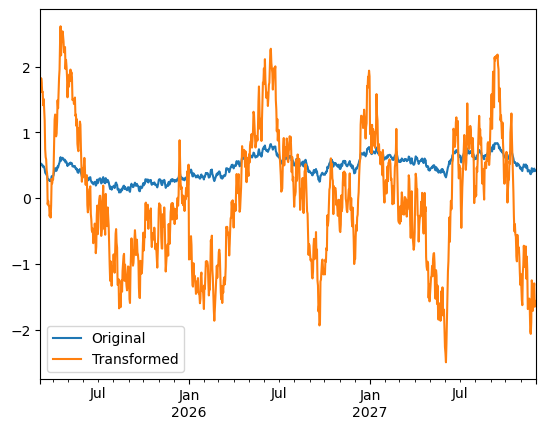

In [84]:
# Plot original and normalized time Series
compare = pd.DataFrame({'Original': ts, 'Transformed': transformed})
compare.plot()

In [85]:
# Create DataFrame with missing values
cols = ['A', 'B', 'C']
values = np.random.randn(1000, 3)

values[np.random.randint(0, 1000, 100), 0] = np.nan
values[np.random.randint(0, 1000,  50), 1] = np.nan
values[np.random.randint(0, 1000, 200), 2] = np.nan

data_df = pd.DataFrame(values, columns=cols)
data_df

,A,B,C
0,NaN,0.086231,-0.450325
1,-0.546391,-0.856067,0.171460
2,0.217477,0.388180,0.587589
3,0.031803,-0.529303,0.098584
4,-0.199252,-0.112437,-0.500668
...,...,...,...
995,0.299159,NaN,0.786709
996,-1.119938,-1.629571,0.732524
997,0.905063,-0.530555,NaN
998,0.677227,NaN,-0.614231


In [86]:
# Randomly assign a country to each row
countries = np.array(['US', 'UK', 'GR', 'JP'])
key = countries[np.random.randint(0, 4, 1000)]
data_df['key'] = key
data_df

,A,B,C,key
0,NaN,0.086231,-0.450325,GR
1,-0.546391,-0.856067,0.171460,US
2,0.217477,0.388180,0.587589,JP
3,0.031803,-0.529303,0.098584,JP
4,-0.199252,-0.112437,-0.500668,JP
...,...,...,...,...
995,0.299159,NaN,0.786709,JP
996,-1.119938,-1.629571,0.732524,US
997,0.905063,-0.530555,NaN,US
998,0.677227,NaN,-0.614231,US


In [87]:
# Group by country
# Get mean of each group, skipping missing values
data_df.groupby('key').mean()

,A,B,C
key,,,
GR,-0.020137,0.061039,0.073550
JP,0.019730,-0.061951,-0.051764
UK,0.032984,0.004836,0.039566
US,0.019724,-0.033962,0.095897


In [88]:
# Fill missing values with the mean of each group
data_df.groupby('key').transform(lambda x: x.fillna(x.mean()))

,A,B,C
0,-0.020137,0.086231,-0.450325
1,-0.546391,-0.856067,0.171460
2,0.217477,0.388180,0.587589
3,0.031803,-0.529303,0.098584
4,-0.199252,-0.112437,-0.500668
...,...,...,...
995,0.299159,-0.061951,0.786709
996,-1.119938,-1.629571,0.732524
997,0.905063,-0.530555,0.095897
998,0.677227,-0.033962,-0.614231


## Window and resample operations

In [89]:
# Create DataFrame
df_re = pd.DataFrame({
    'A': [1] * 10 + [5] * 10,
    'B': np.arange(20)
})

df_re

,A,B
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9


In [90]:
# Group by 'A'
# Calculate rolling mean of column 'B' within each group
df_re.groupby('A').rolling(4).B.mean()

A    
1  0      NaN
   1      NaN
   2      NaN
   3      1.5
   4      2.5
   5      3.5
   6      4.5
   7      5.5
   8      6.5
   9      7.5
5  10     NaN
   11     NaN
   12     NaN
   13    11.5
   14    12.5
   15    13.5
   16    14.5
   17    15.5
   18    16.5
   19    17.5
Name: B, dtype: float64

In [91]:
# Group by 'A'
# Calculate expanding sum of column 'B' within each group
df_re.groupby('A').expanding().B.sum()

A    
1  0       0.0
   1       1.0
   2       3.0
   3       6.0
   4      10.0
   5      15.0
   6      21.0
   7      28.0
   8      36.0
   9      45.0
5  10     10.0
   11     21.0
   12     33.0
   13     46.0
   14     60.0
   15     75.0
   16     91.0
   17    108.0
   18    126.0
   19    145.0
Name: B, dtype: float64

In [92]:
# Create time series DataFrame
df_re = pd.DataFrame(
    {
        'date': pd.date_range('2024-11-28', periods=4, freq='W'),
        'group': [1, 1, 2, 2],
        'val': [5, 6, 7, 8]
    }
).set_index('date')

df_re

,group,val
date,,
2024-12-01,1,5
2024-12-08,1,6
2024-12-15,2,7
2024-12-22,2,8


In [93]:
# Group by 'group'
# Resample to get 'val' for each day in each group (rather than each week)
# Fill missing values with ffill
df_re.groupby('group').resample('D').ffill()

group  val
group date                  
1     2024-12-01      1    5
      2024-12-02      1    5
      2024-12-03      1    5
      2024-12-04      1    5
      2024-12-05      1    5
      2024-12-06      1    5
      2024-12-07      1    5
      2024-12-08      1    6
2     2024-12-15      2    7
      2024-12-16      2    7
      2024-12-17      2    7
      2024-12-18      2    7
      2024-12-19      2    7
      2024-12-20      2    7
      2024-12-21      2    7
      2024-12-22      2    8

# Filtration

In [94]:
# Show animal speeds DataFrame
speeds

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [95]:
# Group by 'class'
# Select 2nd row in each group
speeds.groupby('class').nth(0)

,class,order,max_speed
falcon,bird,Falconiformes,389.0
lion,mammal,Carnivora,80.2


## Built-in filtrations
- `head()`  -- Select the top rows of each group
- `tail()`  -- Select the bottom rows of each group
- `nth()`   -- Select the nth rows of each group 

In [96]:
# Create DataFrame
product_volumes = pd.DataFrame({
    'group': list('xxxxyyy'),
    'product': list('abcdefg'),
    'volume': [10, 30, 20, 15, 40, 10, 20]
})

product_volumes

,group,product,volume
0,x,a,10
1,x,b,30
2,x,c,20
3,x,d,15
4,y,e,40
5,y,f,10
6,y,g,20


In [97]:
# Sort by largest volume products
product_volumes = product_volumes.sort_values('volume', ascending=False)
product_volumes

,group,product,volume
4,y,e,40
1,x,b,30
2,x,c,20
6,y,g,20
3,x,d,15
0,x,a,10
5,y,f,10


In [98]:
# Group products by 'group', select grouped product volumes
grouped = product_volumes.groupby('group')['volume']
grouped.apply(lambda x: x[:], include_groups=False)

group   
x      1    30
       2    20
       3    15
       0    10
y      4    40
       6    20
       5    10
Name: volume, dtype: int64

In [99]:
# Calculate the cumulative percentage of product volume
cumpct = grouped.cumsum() / grouped.transform('sum')
cumpct

4    0.571429
1    0.400000
2    0.666667
6    0.857143
3    0.866667
0    1.000000
5    1.000000
Name: volume, dtype: float64

In [100]:
# Select 'significant' products, which are products that make up 90% of the total product volume
significant_products = product_volumes[cumpct < 0.9]
significant_products.sort_values(['group', 'product'])

,group,product,volume
1,x,b,30
2,x,c,20
3,x,d,15
4,y,e,40
6,y,g,20


## The `filter` method

In [101]:
# Create Series
sf = pd.Series([1, 1, 2, 3, 3, 3])
sf

0    1
1    1
2    2
3    3
4    3
5    3
dtype: int64

In [104]:
# Group Series by element values
sf_grouped = sf.groupby(sf)
sf_grouped.groups

{1: [0, 1], 2: [2], 3: [3, 4, 5]}

In [ ]:
# Filter for groups whose sum is larger than 2
sf_grouped.filter(lambda x: x.sum() > 2)

3    3
4    3
5    3
dtype: int64

In [111]:
# Create DataFrame
dff = pd.DataFrame({
    'A': np.arange(8),
    'B': list('aabbbbcc')
})

dff

,A,B
0,0,a
1,1,a
2,2,b
3,3,b
4,4,b
5,5,b
6,6,c
7,7,c


In [114]:
# Group by 'B'
dff.groupby('B').groups

{'a': [0, 1], 'b': [2, 3, 4, 5], 'c': [6, 7]}

In [112]:
# Group by 'B'
# Filter for groups that have more than 2 members
dff.groupby('B').filter(lambda x: len(x) > 2)

,A,B
2,2,b
3,3,b
4,4,b
5,5,b


In [113]:
# Group by 'B'
# Filter for groups that have more than 2 members,
# filling in groups that have less than or equal to 2 members with NaN
# to preserve shape of original DataFrame
dff.groupby('B').filter(lambda x: len(x) > 2, dropna=False)

,A,B
0,NaN,NaN
1,NaN,NaN
2,2.0,b
3,3.0,b
4,4.0,b
5,5.0,b
6,NaN,NaN
7,NaN,NaN


# Flexible `apply`

In [115]:
# Show DataFrame
df

,A,B,C,D
0,foo,one,1.011765,-0.550938
1,bar,one,-1.061426,-1.244113
2,foo,two,1.084979,2.411466
3,bar,three,0.440198,-1.018983
4,foo,two,-0.160955,1.124747
5,bar,two,-1.523134,0.354417
6,foo,one,0.511328,-0.131943
7,foo,three,0.016783,0.966894


In [116]:
# Group by 'A'
grouped = df.groupby('A')
grouped.groups

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [117]:
# Describe groups in column 'C' using apply()
grouped['C'].apply(lambda x: x.describe())

A         
bar  count    3.000000
     mean    -0.714788
     std      1.026541
     min     -1.523134
     25%     -1.292280
     50%     -1.061426
     75%     -0.310614
     max      0.440198
foo  count    5.000000
     mean     0.492780
     std      0.564432
     min     -0.160955
     25%      0.016783
     50%      0.511328
     75%      1.011765
     max      1.084979
Name: C, dtype: float64

In [118]:
# Group by 'A', select column 'C'
grouped = df.groupby('A')['C']
grouped.groups

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [119]:
# Apply custom function to groups in column 'C'
def f(group):
    return pd.DataFrame({
        'original': group,
        'demeaned': group - group.mean()
    })
    
grouped.apply(f)

original  demeaned
A                        
bar 1 -1.061426 -0.346639
    3  0.440198  1.154985
    5 -1.523134 -0.808347
foo 0  1.011765  0.518985
    2  1.084979  0.592199
    4 -0.160955 -0.653735
    6  0.511328  0.018548
    7  0.016783 -0.475997

In [120]:
# Create Series
s = pd.Series(np.random.randn(5))
s

0   -0.915410
1   -0.903836
2    0.681054
3    0.954436
4   -0.194444
dtype: float64

In [121]:
# Apply custom function to Series
def f(x):
    return pd.Series([x, x ** 2], index=['x', 'x^2'])

s.apply(f)

,x,x^2
0,-0.915410,0.837976
1,-0.903836,0.816920
2,0.681054,0.463835
3,0.954436,0.910949
4,-0.194444,0.037808


## Control grouped column(s) placement with `group_keys`

In [122]:
# Show DataFrame
df

,A,B,C,D
0,foo,one,1.011765,-0.550938
1,bar,one,-1.061426,-1.244113
2,foo,two,1.084979,2.411466
3,bar,three,0.440198,-1.018983
4,foo,two,-0.160955,1.124747
5,bar,two,-1.523134,0.354417
6,foo,one,0.511328,-0.131943
7,foo,three,0.016783,0.966894


In [124]:
# Group by 'A'
# Keep grouped column in index
df.groupby('A', group_keys=True).apply(lambda x: x, include_groups=False)

B         C         D
A                               
bar 1    one -1.061426 -1.244113
    3  three  0.440198 -1.018983
    5    two -1.523134  0.354417
foo 0    one  1.011765 -0.550938
    2    two  1.084979  2.411466
    4    two -0.160955  1.124747
    6    one  0.511328 -0.131943
    7  three  0.016783  0.966894

In [125]:
# Group by 'A'
# Drop grouped column from index
df.groupby('A', group_keys=False).apply(lambda x: x, include_groups=False)

,B,C,D
0,one,1.011765,-0.550938
1,one,-1.061426,-1.244113
2,two,1.084979,2.411466
3,three,0.440198,-1.018983
4,two,-0.160955,1.124747
5,two,-1.523134,0.354417
6,one,0.511328,-0.131943
7,three,0.016783,0.966894


# Numba Accelerated Routines
`transform` and `aggregate` support `engine='numba'` and `engine_kwargs` arguments.

# Other useful features

## Exclusion of non-numeric columns

In [126]:
# Show DataFrame
df

,A,B,C,D
0,foo,one,1.011765,-0.550938
1,bar,one,-1.061426,-1.244113
2,foo,two,1.084979,2.411466
3,bar,three,0.440198,-1.018983
4,foo,two,-0.160955,1.124747
5,bar,two,-1.523134,0.354417
6,foo,one,0.511328,-0.131943
7,foo,three,0.016783,0.966894


In [130]:
# Group by 'A'
# Attempt to compute standard deviation of all groups
try:
    df.groupby('A').std()
except ValueError as e:
    print('ValueError:', e)

ValueError: could not convert string to float: 'one'


In [131]:
# Group by 'A'
# Compute standard deviation of all numeric groups
df.groupby('A').std(numeric_only=True)

,C,D
A,,
bar,1.026541,0.865275
foo,0.564432,1.163746


## Handling of (un)observed Categorical values

In [132]:
# Create categorical Series
s = pd.Series(pd.Categorical(['a', 'a', 'a'], categories=['a', 'b']))
s

0    a
1    a
2    a
dtype: category
Categories (2, object): ['a', 'b']

In [ ]:
# Group Series, including unobserved categories
# Count the number of occurrences of each category
s.groupby(s, observed=False).count()

a    3
b    0
dtype: int64

In [135]:
# Group Series, excluding unobserved categories
# Count the number of occurrences of each category
s.groupby(s, observed=True).count()

a    3
dtype: int64

## NA group handling

In [136]:
# Create DataFrame with missing values
df = pd.DataFrame({
    'key': [1.0, 1.0, np.nan, 2.0, np.nan],
    'A': [1, 2, 3, 4, 5]
})

df

,key,A
0,1.0,1
1,1.0,2
2,NaN,3
3,2.0,4
4,NaN,5


In [137]:
# Group by column with missing values, dropping missing values
df.groupby('key', dropna=True).sum()

,A
key,
1.0,3
2.0,4


In [138]:
# Group by column with missing values, keeping missing values
df.groupby('key', dropna=False).sum()

,A
key,
1.0,3
2.0,4
NaN,8


## Grouping with ordered factors

In [139]:
# Create DataFrame with categorical data
days = pd.Categorical(
    values=['Wed', 'Mon', 'Thu', 'Mon', 'Wed', 'Sat'],
    categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
)

data = pd.DataFrame({
    'day': days,
    'workers': [3, 4, 1, 4, 2, 2]
})

data

,day,workers
0,Wed,3
1,Mon,4
2,Thu,1
3,Mon,4
4,Wed,2
5,Sat,2


In [142]:
# Group by categorical value 'day'
# Include unobserved categories
# Leave groups unsorted
# Sum number of workers in each group
data.groupby('day', observed=False, sort=False).sum()

,workers
day,
Wed,5
Mon,8
Thu,1
Sat,2
Tue,0
Fri,0
Sun,0


In [143]:
# Group by categorical value 'day'
# Include unobserved categories
# Sort groups by 'day' order
# Sum number of workers in each group
data.groupby('day', observed=False, sort=True).sum()

,workers
day,
Mon,8
Tue,0
Wed,5
Thu,1
Fri,0
Sat,2
Sun,0


## Grouping with a grouper specifcation

In [146]:
# Create DataFrame with time series data
import datetime

df = pd.DataFrame({
    'Branch': 'A A A A A A A B'.split(),
    'Buyer': 'Carl Mark Carl Carl Joe Joe Joe Carl'.split(),
    'Quantity': [1, 3, 5, 1, 8, 1, 9, 3],
    'Date': [
        datetime.datetime(2024, 11, 29, 13, 0),
        datetime.datetime(2024, 11, 29, 13, 5),
        datetime.datetime(2024, 11, 30, 20, 0),
        datetime.datetime(2024, 12, 1, 10, 0),
        datetime.datetime(2024, 11, 30, 20, 0),
        datetime.datetime(2024, 12, 1, 10, 0),
        datetime.datetime(2024, 12, 2, 12, 0),
        datetime.datetime(2024, 12, 2, 14, 0)
    ]
})

df

,Branch,Buyer,Quantity,Date
0,A,Carl,1,2024-11-29 13:00:00
1,A,Mark,3,2024-11-29 13:05:00
2,A,Carl,5,2024-11-30 20:00:00
3,A,Carl,1,2024-12-01 10:00:00
4,A,Joe,8,2024-11-30 20:00:00
5,A,Joe,1,2024-12-01 10:00:00
6,A,Joe,9,2024-12-02 12:00:00
7,B,Carl,3,2024-12-02 14:00:00


In [148]:
# Group by 'Date' with desired frequency, 'Buyer'
df.groupby([pd.Grouper(key='Date', freq='1ME'), 'Buyer'])[['Quantity']].sum()

Quantity
Date       Buyer          
2024-11-30 Carl          6
           Joe           8
           Mark          3
2024-12-31 Carl          4
           Joe          10

## Taking the first rows of each group

In [149]:
# Create DataFrame
df = pd.DataFrame([[1, 2], [1, 4], [5, 6]], columns=['A', 'B'])
df

,A,B
0,1,2
1,1,4
2,5,6


In [150]:
# Group by 'A', get first row of each group
df.groupby('A').head(1)

,A,B
0,1,2
2,5,6


In [151]:
# Group by 'A', get last row of each group
df.groupby('A').tail(1)

,A,B
1,1,4
2,5,6


## Taking the nth row of each group

In [152]:
# Create DataFrame
df = pd.DataFrame([[1, np.nan], [1, 4], [5, 6]], columns=['A', 'B'])
df

,A,B
0,1,NaN
1,1,4.0
2,5,6.0


In [153]:
# Group by 'A', get first row of each group
df.groupby('A').nth(0)

,A,B
0,1,NaN
2,5,6.0


In [154]:
# Group by 'A', get last row of each group
df.groupby('A').nth(-1)

,A,B
1,1,4.0
2,5,6.0


In [155]:
# Group by 'A', get second row of each group
df.groupby('A').nth(1)

,A,B
1,1,4.0


In [156]:
# Create DataFrame
business_dates = pd.date_range(start='4/1/2024', end='6/30/2024', freq='B')
df = pd.DataFrame(1, index=business_dates, columns=['a', 'b'])
df

,a,b
2024-04-01,1,1
2024-04-02,1,1
2024-04-03,1,1
2024-04-04,1,1
2024-04-05,1,1
...,...,...
2024-06-24,1,1
2024-06-25,1,1
2024-06-26,1,1
2024-06-27,1,1


In [157]:
# Group by year and month
# Get first, fourth, and last row of each group
df.groupby([df.index.year, df.index.month]).nth([0, 3, -1])

,a,b
2024-04-01,1,1
2024-04-04,1,1
2024-04-30,1,1
2024-05-01,1,1
2024-05-06,1,1
2024-05-31,1,1
2024-06-03,1,1
2024-06-06,1,1
2024-06-28,1,1


## Enumerate group items

In [158]:
# Create DataFrame
dfg = pd.DataFrame(list('aaabba'), columns=['A'])
dfg

,A
0,a
1,a
2,a
3,b
4,b
5,a


In [160]:
# Group by 'A'
# Use cumcount() to see order that each row appears within grou[p]
dfg.groupby('A').cumcount()

0    0
1    1
2    2
3    0
4    1
5    3
dtype: int64

## Enumerate groups

In [161]:
# Show DataFrame
dfg

,A
0,a
1,a
2,a
3,b
4,b
5,a


In [163]:
# Group by 'A'
# Show which rows appear in which group, with group ordering
dfg.groupby('A').ngroup()

0    0
1    0
2    0
3    1
4    1
5    0
dtype: int64

## Plotting

In [166]:
# Create DataFrame
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(50, 2), columns=['x', 'y'])
df

,x,y
0,0.471435,-1.190976
1,1.432707,-0.312652
2,-0.720589,0.887163
3,0.859588,-0.636524
4,0.015696,-2.242685
5,1.150036,0.991946
6,0.953324,-2.021255
7,-0.334077,0.002118
8,0.405453,0.289092
9,1.321158,-1.546906


In [167]:
# Randomly assign values to group 'A' or 'B'
df['g'] = np.random.choice(['A', 'B'], size=50)
df

,x,y,g
0,0.471435,-1.190976,A
1,1.432707,-0.312652,A
2,-0.720589,0.887163,B
3,0.859588,-0.636524,A
4,0.015696,-2.242685,B
5,1.150036,0.991946,A
6,0.953324,-2.021255,A
7,-0.334077,0.002118,A
8,0.405453,0.289092,A
9,1.321158,-1.546906,A


A         Axes(0.1,0.15;0.363636x0.75)
B    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

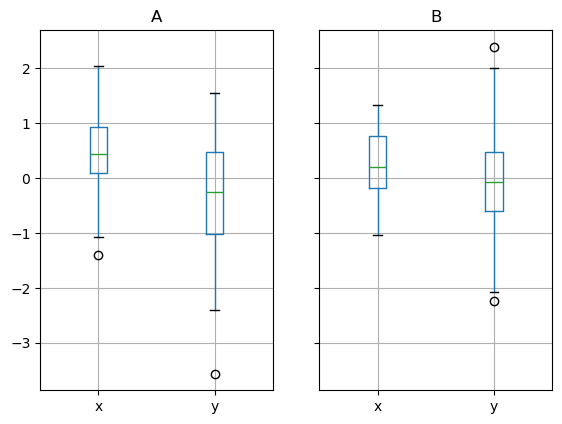

In [168]:
# Plot boxplots of 'x' and 'y' for each group
df.groupby('g').boxplot()

## Piping function calls

In [169]:
# Create DataFrame
n = 1000
df = pd.DataFrame({
    'Store': np.random.choice(['Store_1', 'Store_2'], n),
    'Product': np.random.choice(['Product_1', 'Product_2'], n),
    'Revenue': (np.random.random(n) * 50 + 10).round(2),
    'Quantity': np.random.randint(1, 10, size=n)
})

df

,Store,Product,Revenue,Quantity
0,Store_2,Product_1,26.12,1
1,Store_2,Product_1,28.86,1
2,Store_2,Product_1,35.11,9
3,Store_1,Product_1,32.50,1
4,Store_1,Product_2,33.37,1
...,...,...,...,...
995,Store_1,Product_2,12.62,7
996,Store_1,Product_1,26.43,4
997,Store_1,Product_1,37.99,4
998,Store_1,Product_1,51.89,9


In [170]:
# Find prices of products per store
(
    df.groupby(['Store', 'Product'])
    .pipe(lambda grp: grp.Revenue.sum() / grp.Quantity.sum())
    .unstack()
    .round(2)
)

Product,Product_1,Product_2
Store,,
Store_1,6.82,7.05
Store_2,6.30,6.64


In [171]:
# Use pipe to apply arbitary function to groups
def mean(groupby):
    return groupby.mean()

df.groupby(['Store', 'Product']).pipe(mean)

Revenue  Quantity
Store   Product                       
Store_1 Product_1  34.622727  5.075758
        Product_2  35.482815  5.029630
Store_2 Product_1  32.972837  5.237589
        Product_2  34.684360  5.224000

# Examples

## Multi-column factorization

In [172]:
# Create DataFrame
dfg = pd.DataFrame({
    'A': [1, 1, 2, 3, 2],
    'B': list('aaaba')
})

dfg

,A,B
0,1,a
1,1,a
2,2,a
3,3,b
4,2,a


In [ ]:
# Group by 'A' and 'B' and show groups
dfg.groupby(['A', 'B']).groups

{(1, 'a'): [0, 1], (2, 'a'): [2, 4], (3, 'b'): [3]}

In [175]:
# Group by 'A' and 'B' and enumerate which rows belong to which groups
dfg.groupby(['A', 'B']).ngroup()

0    0
1    0
2    1
3    2
4    1
dtype: int64

In [176]:
# Group by 'A' and [0, 0, 0, 1, 1] and show groups
dfg.groupby(['A', [0, 0, 0, 1, 1]]).groups

{(1, 0): [0, 1], (2, 0): [2], (2, 1): [4], (3, 1): [3]}

In [177]:
# Group by 'A' and [0, 0, 0, 1, 1] and enumerate which rows belong to which groups
dfg.groupby(['A', [0, 0, 0, 1, 1]]).ngroup()

0    0
1    0
2    1
3    3
4    2
dtype: int64

## Groupby by indexer to 'resample' data

In [178]:
# Create DataFrame
df = pd.DataFrame(np.random.randn(10, 2))
df

,0,1
0,-0.793893,0.321153
1,0.342250,1.618906
2,-0.975807,1.918201
3,-0.810847,-1.405919
4,-1.977759,0.461659
5,0.730057,-1.316938
6,-0.751328,0.528290
7,-0.257759,-1.081009
8,0.505895,-1.701948
9,-1.006349,0.020208


In [179]:
# Integer division of DataFrame index effectively bins data into 2 bins
df.index // 5

Index([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype='int64')

In [180]:
# Downsample by binning data into 2 bins, take standard deviation of bins
df.groupby(df.index // 5).std()

,0,1
0,0.823647,1.312912
1,0.760109,0.942941


## Returning a `Series` to propagate names

In [181]:
# Create DataFrame
df = pd.DataFrame({
    'a': [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2],
    'b': [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
    'c': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'd': [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]
})

df

,a,b,c,d
0,0,0,1,0
1,0,0,0,0
2,0,1,1,0
3,0,1,0,1
4,1,0,1,0
5,1,0,0,0
6,1,1,1,0
7,1,1,0,1
8,2,0,1,0
9,2,0,0,0


In [183]:
# Compute metrics for each group and return results as a named Series
def compute_metrics(grp):
    result = {
        'b_sum': grp['b'].sum(),
        'c_mean': grp['c'].mean()
    }
    return pd.Series(result, name='metrics')

result = df.groupby('a').apply(compute_metrics, include_groups=False)
result

metrics,b_sum,c_mean
a,,
0,2.0,0.5
1,2.0,0.5
2,2.0,0.5


In [185]:
# Stack result
result.stack(future_stack=True)

a  metrics
0  b_sum      2.0
   c_mean     0.5
1  b_sum      2.0
   c_mean     0.5
2  b_sum      2.0
   c_mean     0.5
dtype: float64